Some relevant columns in the dataset:

- **Date** - The date of the observation
- **AveragePrice** - the average price of a single avocado
- **type** - conventional or organic
- **year** - the year
- **Region** - the city or region of the observation
- **Total Volume** - Total number of avocados sold
- **4046** - Total number of avocados with PLU 4046 sold
- **4225** - Total number of avocados with PLU 4225 sold
- **4770** - Total number of avocados with PLU 4770 sold

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv('data/avocado.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


### data info

In [28]:
df.shape

(18249, 13)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


In [31]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [32]:
df1 = df.copy()
df1 = df1.sort_values(by='Date')
df1['Date'] = pd.to_datetime(df['Date'])
df1.set_index('Date',inplace = True)

In [33]:
df1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral


In [34]:
df1[(df1['region'] == 'West') | (df1['region'] == 'California')]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2015-01-04,1.24,142349.77,107490.73,25711.96,2.93,9144.15,9144.15,0.00,0.00,organic,2015,California
2015-01-04,0.93,5777334.90,2843648.26,2267755.26,137479.64,528451.74,477193.38,47882.56,3375.80,conventional,2015,California
2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
2015-01-11,1.10,158110.68,123712.51,25975.27,1.47,8421.43,8421.43,0.00,0.00,organic,2015,California
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-18,1.02,6802084.11,2161037.82,2305253.24,94087.86,2241705.19,2116307.93,38597.17,86800.09,conventional,2018,California
2018-03-25,0.93,7667064.46,2567279.74,1912986.38,118289.91,3068508.43,1309580.19,1745630.06,13298.18,conventional,2018,West
2018-03-25,1.60,271723.08,26996.28,77861.39,117.56,166747.85,87108.00,79495.39,144.46,organic,2018,West


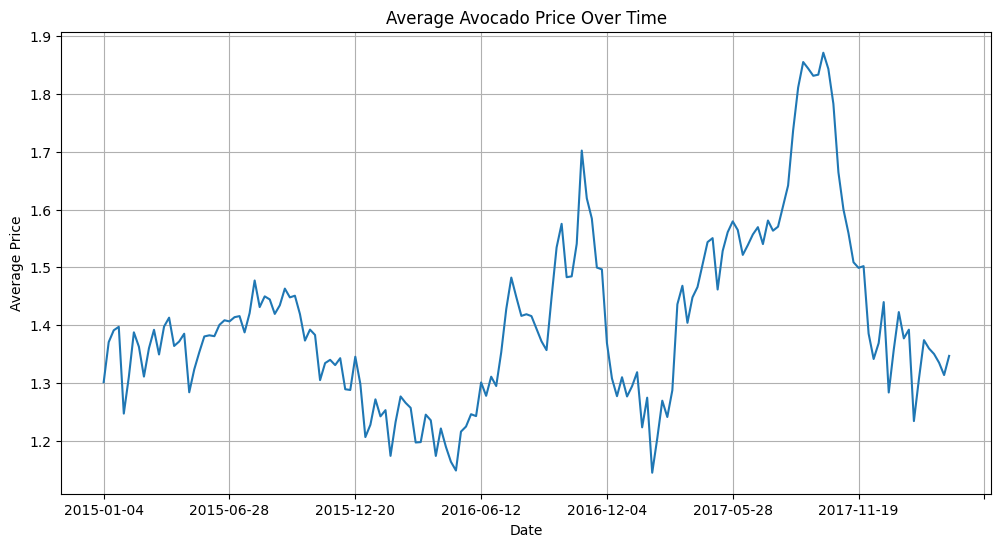

In [35]:
avg_price = df.groupby('Date')['AveragePrice'].mean().reset_index()
avg_price.set_index('Date',inplace = True)
plt.figure(figsize=(12,6))
avg_price['AveragePrice'].plot()
plt.title('Average Avocado Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid()
plt.show()

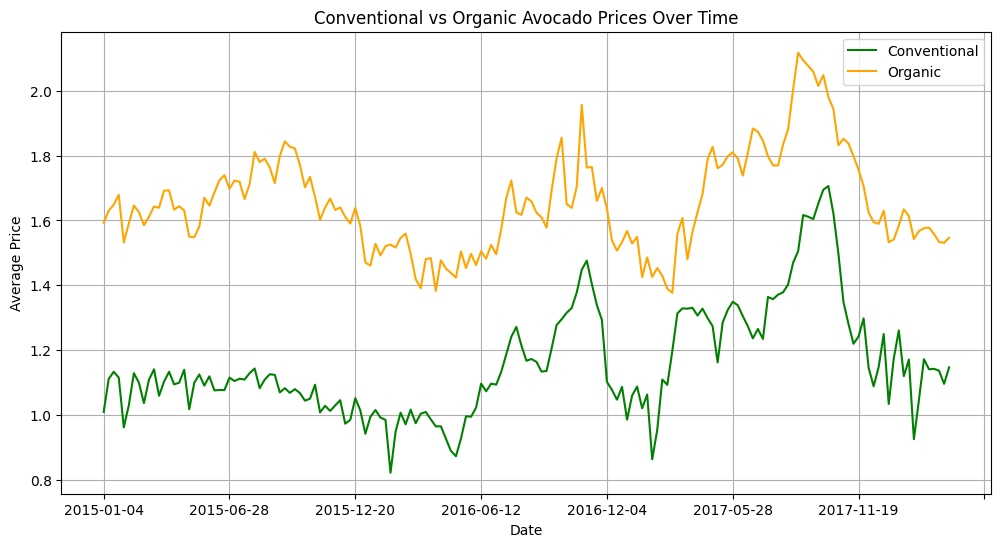

In [36]:
conv_price = df[df['type'] == 'conventional'].groupby('Date')['AveragePrice'].mean().reset_index()
conv_price.set_index('Date',inplace = True)
org_price = df[df['type'] == 'organic'].groupby('Date')['AveragePrice'].mean().reset_index()
org_price.set_index('Date',inplace = True)

# Plot price trends for conventional and organic avocados
plt.figure(figsize=(12, 6))
conv_price['AveragePrice'].plot(label='Conventional', color='green')
org_price['AveragePrice'].plot(label='Organic', color='orange')
plt.title('Conventional vs Organic Avocado Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.grid()
plt.show()

type
conventional    9126
organic         9123
Name: count, dtype: int64


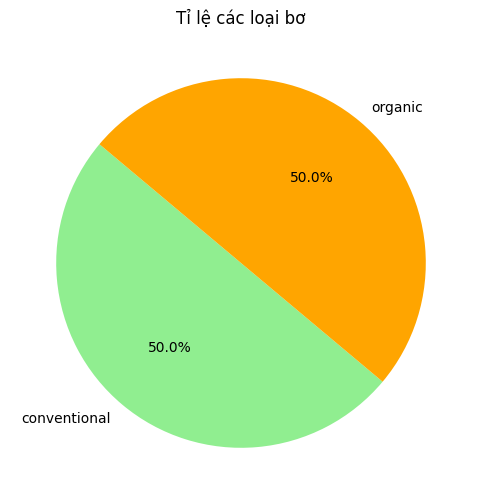

In [37]:
print(df['type'].value_counts())
type_counts = df['type'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'orange'])
plt.title('Tỉ lệ các loại bơ')
plt.show()

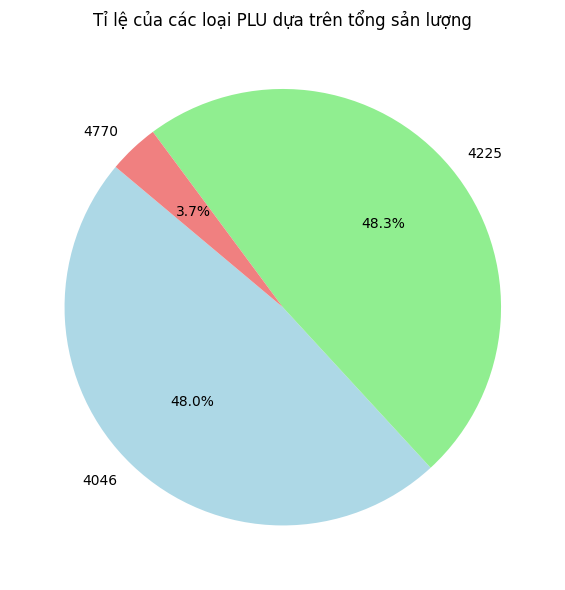

In [38]:
total_sales = df[['4046', '4225', '4770']].sum()
# Plot pie chart for total sales volume
plt.figure(figsize=(8, 6))
plt.pie(total_sales, labels=total_sales.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Tỉ lệ của các loại PLU dựa trên tổng sản lượng')
plt.tight_layout()
plt.show()

In [39]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [40]:
sales_trends = df.groupby('Date')[['4046', '4225', '4770']].sum()

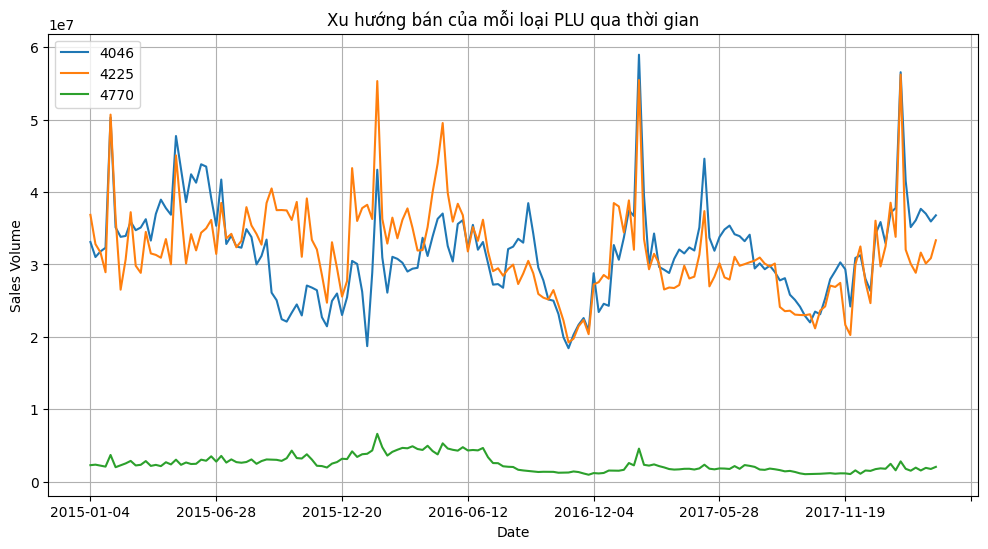

In [41]:

sales_trends = df.groupby('Date')[['4046', '4225', '4770']].sum()

plt.figure(figsize=(12, 6))
for column in sales_trends.columns:
    sales_trends[column].plot(label=column)

plt.title('Xu hướng bán của mỗi loại PLU qua thời gian')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.legend()
plt.grid()
plt.show()

In [42]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


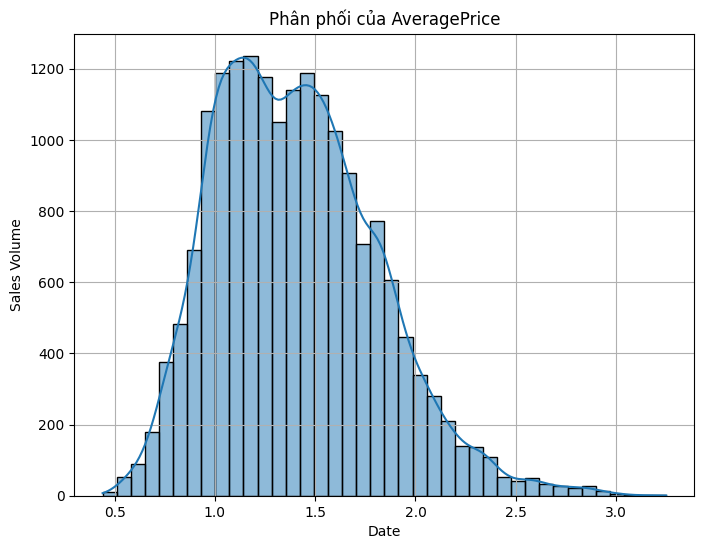

In [43]:
plt.figure(figsize=(8, 6))
sns.histplot(df1['AveragePrice'], kde=True, bins=40)
plt.title('Phân phối của AveragePrice')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.grid()
plt.show()

In [44]:
# # Chuyển thành DataFrame
# top_10_regions = pd.DataFrame(top_10_regions)

# # Định dạng cột "Total Volume" thành số nguyên có dấu phân cách
# top_10_regions["Total Volume"] = top_10_regions["Total Volume"].apply(lambda x: f"{int(x):,}")

NameError: name 'top_10_regions' is not defined

In [171]:
top_10_regions

np.float64(1086779155.75)

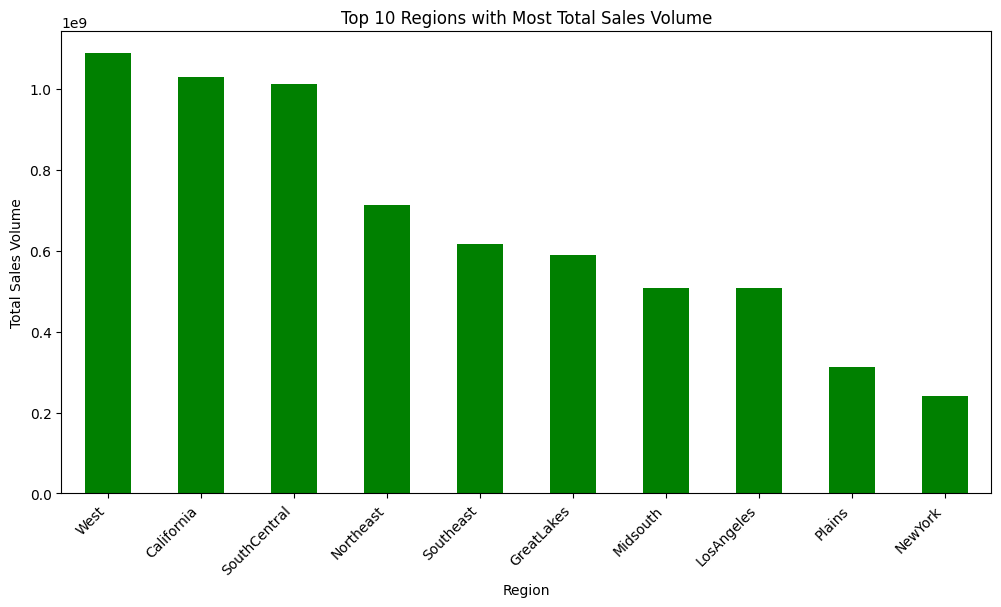

In [169]:
region_sales = df[df['region'] != 'TotalUS'].groupby('region')['Total Volume'].sum()
top_10_regions = region_sales.sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_10_regions.plot(kind='bar', color='green')
plt.title('Top 10 Regions with Most Total Sales Volume')
plt.xlabel('Region')
plt.ylabel('Total Sales Volume')
plt.xticks(rotation=45, ha='right')
plt.show()

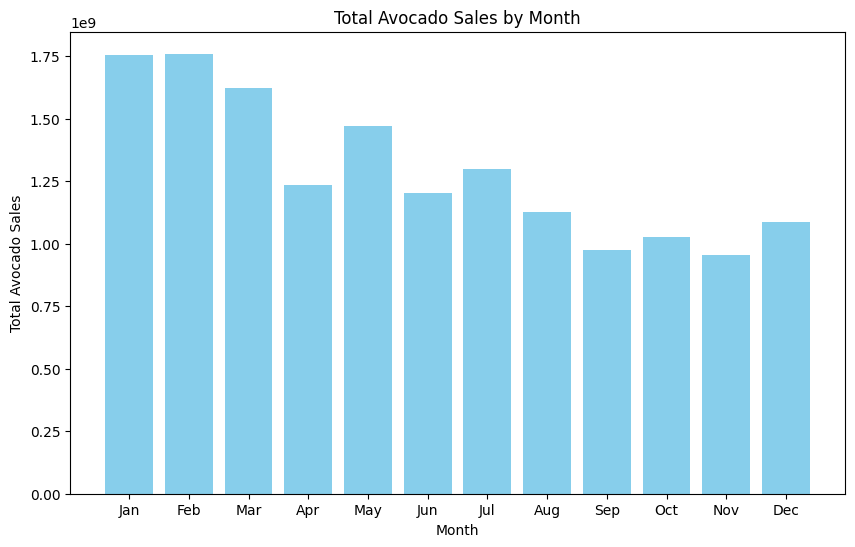

In [45]:
avocado_df = df.copy()
avocado_df['Date'] = pd.to_datetime(avocado_df['Date'])
avocado_df['Month'] = avocado_df['Date'].dt.month
monthly_sales = avocado_df.groupby('Month')['Total Volume'].sum().reset_index()
monthly_sales = monthly_sales.sort_values(by='Total Volume', ascending=False)
monthly_sales = monthly_sales.sort_values(by='Month')
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales['Month'], monthly_sales['Total Volume'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Avocado Sales')
plt.title('Total Avocado Sales by Month')
plt.xticks(monthly_sales['Month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


Number of values in XLarge Bags:  18249
Number of non-zero values in XLarge Bags: 6201
Number of values in Small Bags:  18249
Number of non-zero values in Small Bags: 18090
Number of values in Large Bags:  18249
Number of non-zero values in Large Bags: 15879
Small Bags     3.324871e+09
Large Bags     9.916158e+08
XLarge Bags    5.668918e+07
dtype: float64


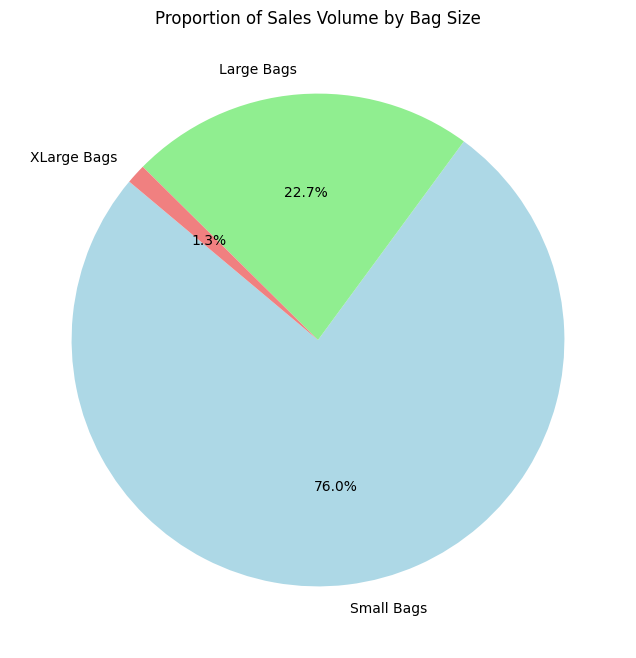

In [46]:
non_zero_xlarge_bags = avocado_df['XLarge Bags'][avocado_df['XLarge Bags'] != 0].count()
print("Number of values in XLarge Bags: ", avocado_df['XLarge Bags'].count())
print("Number of non-zero values in XLarge Bags:", non_zero_xlarge_bags)

# Count non-zero values in "Small Bags"
non_zero_small_bags = avocado_df['Small Bags'][avocado_df['Small Bags'] != 0].count()
print("Number of values in Small Bags: ", avocado_df['Small Bags'].count())
print("Number of non-zero values in Small Bags:", non_zero_small_bags)

# Count non-zero values in "Large Bags"
non_zero_large_bags = avocado_df['Large Bags'][avocado_df['Large Bags'] != 0].count()
print("Number of values in Large Bags: ", avocado_df['Large Bags'].count())
print("Number of non-zero values in Large Bags:", non_zero_large_bags)


# Calculate total sales volume for each bag size
bag_sales = avocado_df[['Small Bags', 'Large Bags', 'XLarge Bags']].sum()

print(bag_sales)

# Plot pie chart for bag size proportions
plt.figure(figsize=(8, 8))
plt.pie(bag_sales, labels=bag_sales.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Proportion of Sales Volume by Bag Size')
plt.show()

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [48]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [49]:
numeric_columns = ['AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
categorical_columns = ['type', 'region']

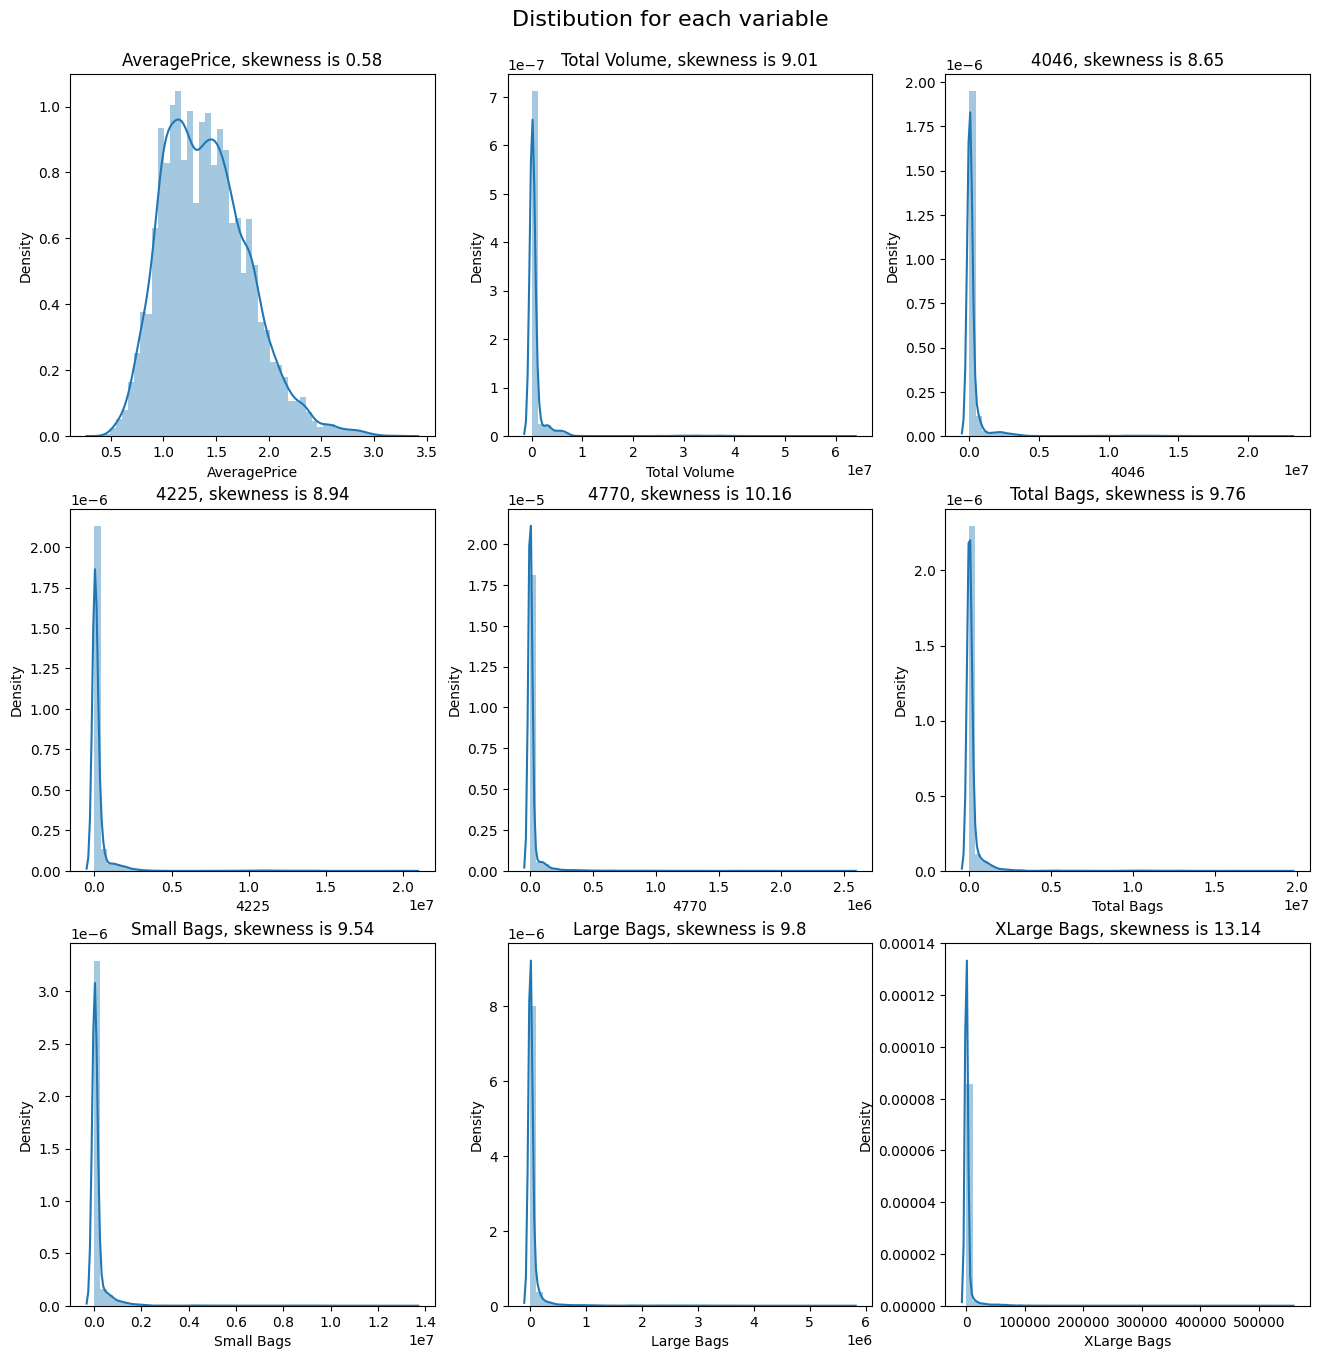

In [50]:
rows=3
cols=3
fig, axs = plt.subplots(rows, cols,figsize=(16,16))
fig.suptitle('Distibution for each variable',y=0.92, size=16)
axs = axs.flatten()
for i, data in enumerate(numeric_columns):
    sns.distplot(df[data], ax=axs[i])
    axs[i].set_title(data + ', skewness is '+str(round(df[data].skew(axis = 0, skipna = True),2)))

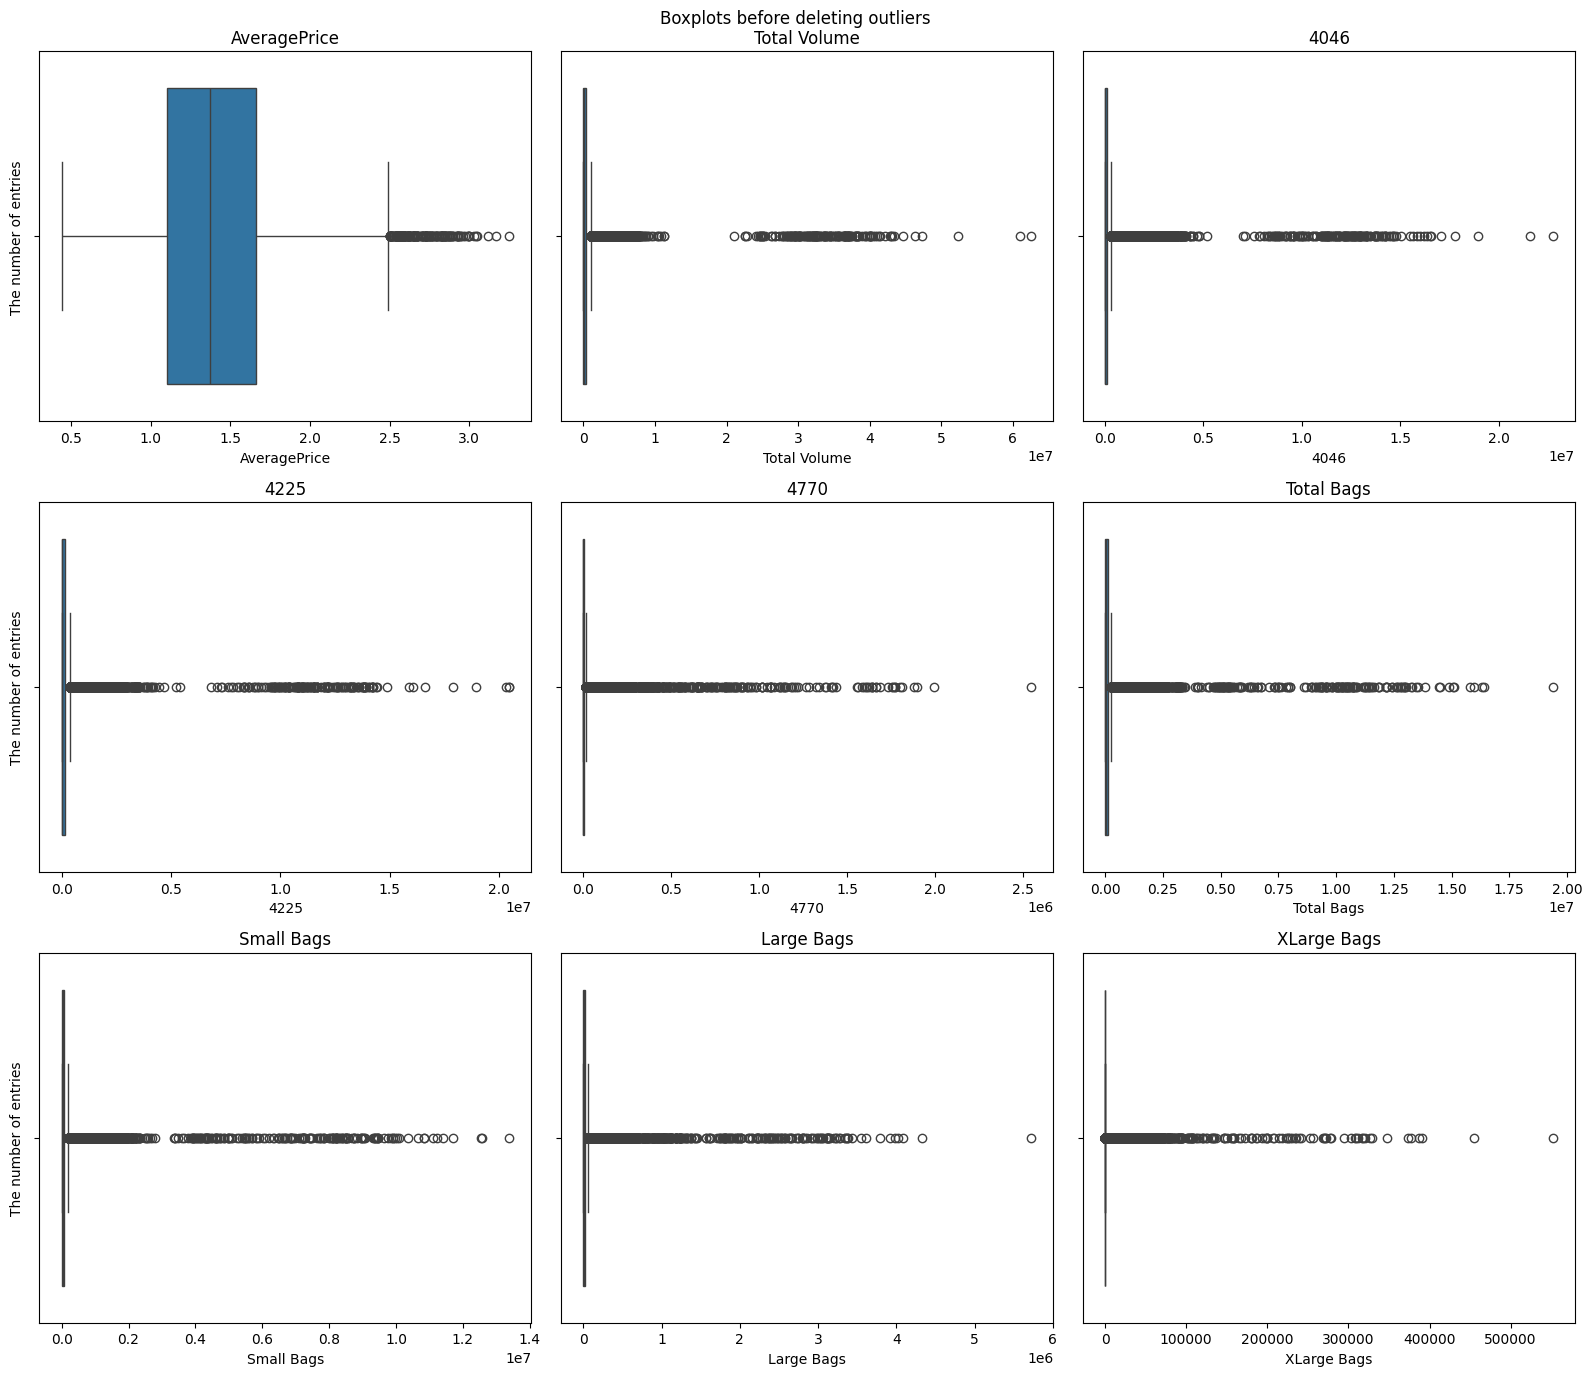

In [51]:
rows=3
cols=3
fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,14))
fig.suptitle('Boxplots before deleting outliers')
axs = axs.flatten()
for i, data in enumerate(numeric_columns):
    if i % 3 == 0:
        axs[i].set_ylabel('The number of entries')
    sns.boxplot( data=df[data], orient='h', ax=axs[i])
    axs[i].set_title(data)
plt.tight_layout()        

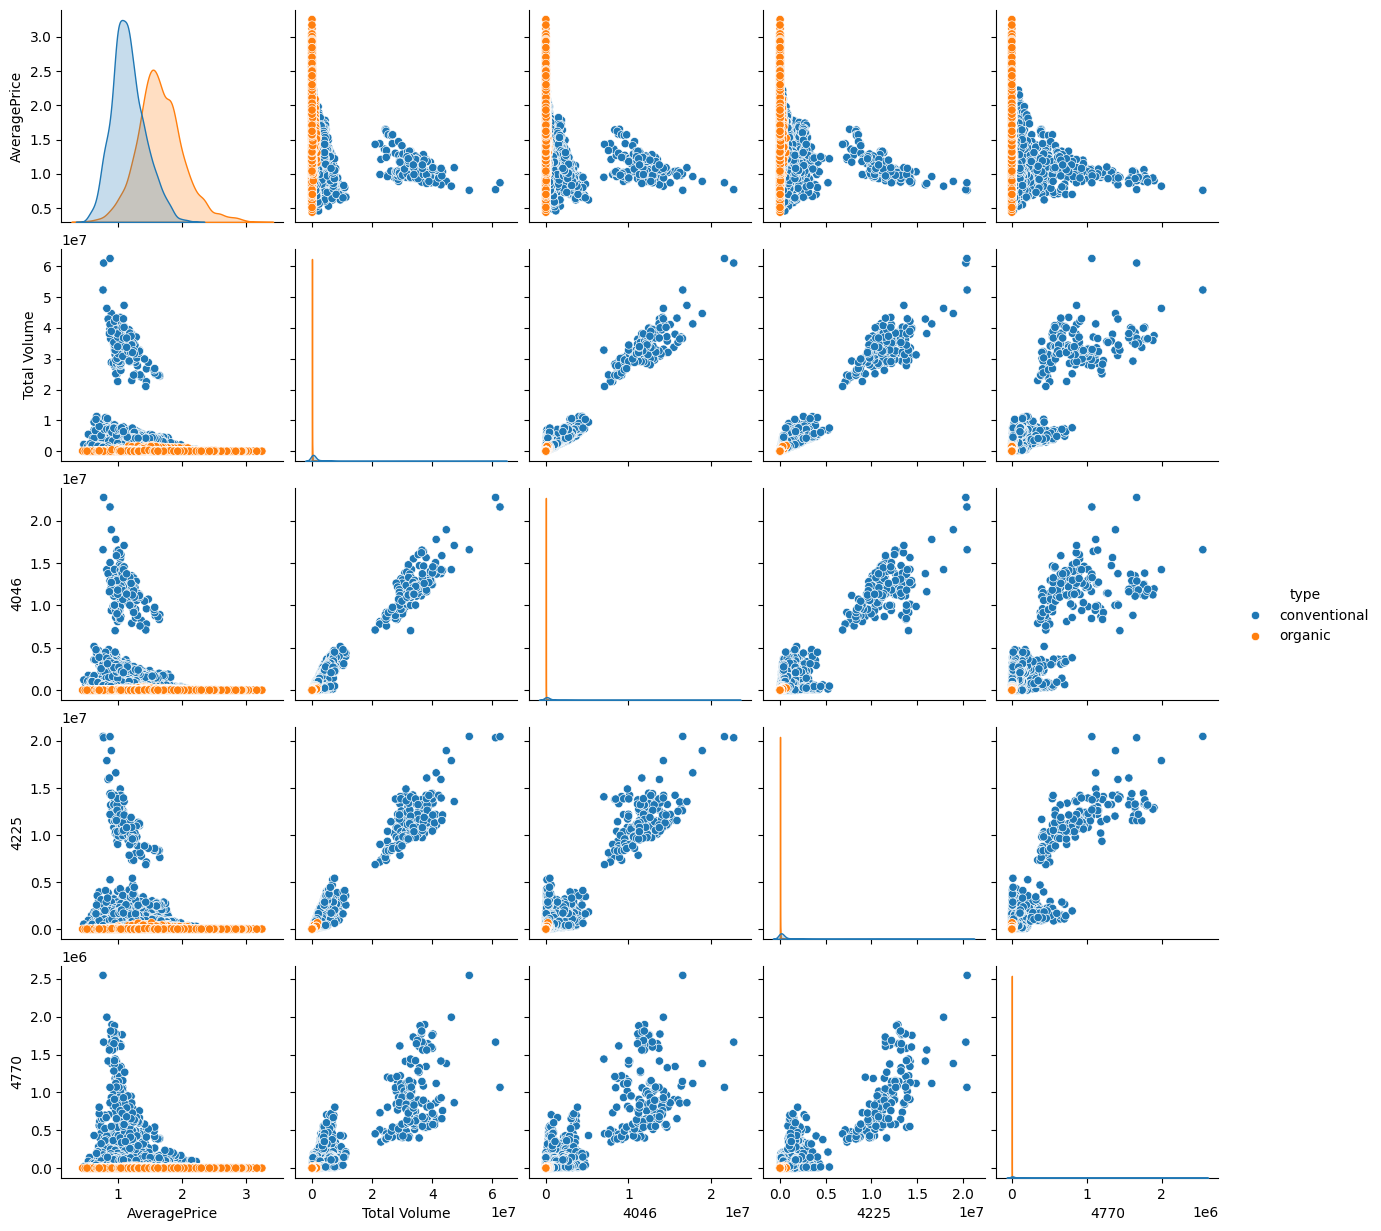

In [52]:
sns.pairplot(data=df[['AveragePrice', 'Total Volume', '4046','4225','4770', 'type']], hue='type')

In [53]:
df1 = df[df.type=='conventional'].groupby(['region', 'Date']).agg({'AveragePrice': 'mean', 'Total Volume': 'mean', '4046': 'mean', '4225': 'mean', '4770': 'mean', 'Total Bags': 'mean', 'Small Bags': 'mean', 'Large Bags': 'mean', 'XLarge Bags': 'mean'}).reset_index()
df2 = df[df.type=='organic'].groupby(['region', 'Date']).agg({'AveragePrice': 'mean', 'Total Volume': 'mean', '4046': 'mean', '4225': 'mean', '4770': 'mean', 'Total Bags': 'mean', 'Small Bags': 'mean', 'Large Bags': 'mean', 'XLarge Bags': 'mean'}).reset_index()

In [54]:
df['Income'] = df['Total Volume']*df['AveragePrice']

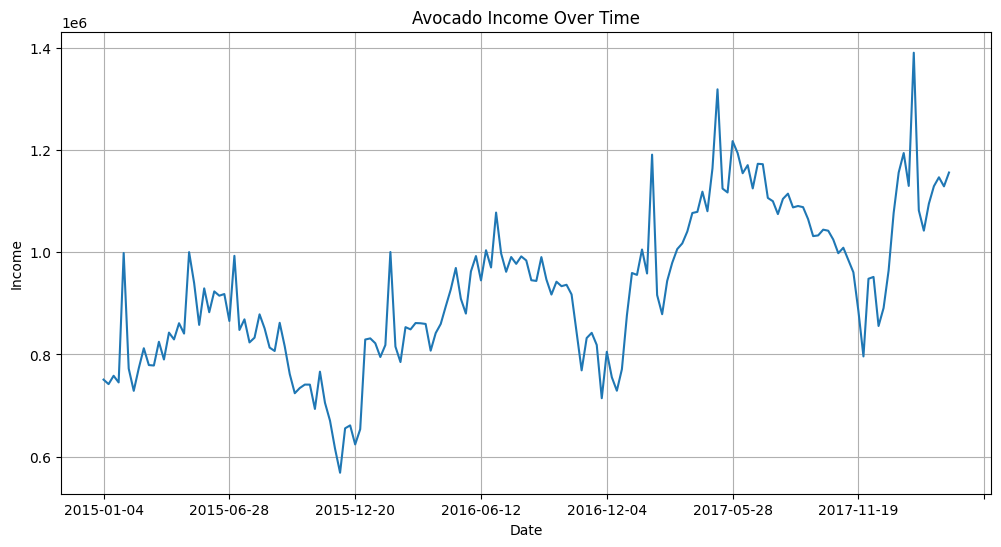

In [57]:
avg_income = df.groupby('Date')['Income'].mean().reset_index()
avg_income.set_index('Date',inplace = True)
plt.figure(figsize=(12,6))
avg_income['Income'].plot()
plt.title('Avocado Income Over Time')
plt.xlabel('Date')
plt.ylabel('Income')
plt.grid()
plt.show()

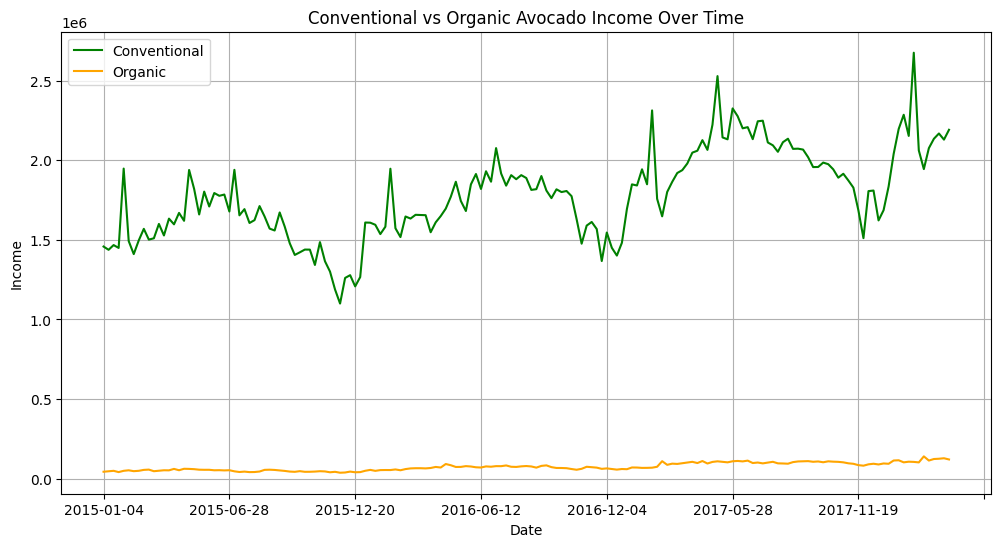

In [58]:
conv_income = df[df['type'] == 'conventional'].groupby('Date')['Income'].mean().reset_index()
conv_income.set_index('Date',inplace = True)
org_income = df[df['type'] == 'organic'].groupby('Date')['Income'].mean().reset_index()
org_income.set_index('Date',inplace = True)

plt.figure(figsize=(12, 6))
conv_income['Income'].plot(label='Conventional', color='green')
org_income['Income'].plot(label='Organic', color='orange')
plt.title('Conventional vs Organic Avocado Income Over Time')
plt.xlabel('Date')
plt.ylabel('Income')
plt.legend()
plt.grid()
plt.show()

<Axes: >

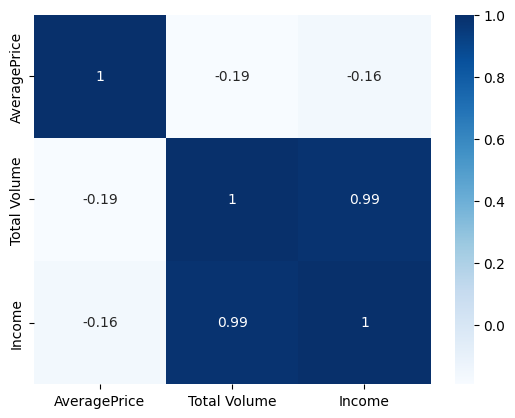

In [56]:
corr = df[['AveragePrice', 'Total Volume', 'Income']].corr(method = 'pearson')
sns.heatmap(corr, annot=True, cmap='Blues')

In [60]:
regions = {
    'Albany': ['NY'],
    'Atlanta': ['GA'],
    'BaltimoreWashington': ['MD', 'DC'],
    'Boise': ['ID'],
    'Boston': ['MA'],
    'BuffaloRochester': ['NY'],
    'California': ['CA'],
    'Charlotte': ['NC'],
    'Chicago': ['IL'],
    'CincinnatiDayton': ['OH'],
    'Columbus': ['OH'],
    'DallasFtWorth': ['TX'],
    'Denver': ['CO'],
    'Detroit': ['MI'],
    'GrandRapids': ['MI'],
    'GreatLakes': ['IL', 'IN', 'MI', 'OH', 'PA'],
    'HarrisburgScranton': ['PA'],
    'HartfordSpringfield': ['CT', 'MA'],
    'Houston': ['TX'],
    'Indianapolis': ['IN'],
    'Jacksonville': ['FL'],
    'LasVegas': ['NV'],
    'LosAngeles': ['CA'],
    'Louisville': ['KY'],
    'MiamiFtLauderdale': ['FL'],
    'Midsouth': ['TN', 'AR', 'MS'],
    'Nashville': ['TN'],
    'NewOrleansMobile': ['LA', 'AL'],
    'NewYork': ['NY'],
    'Northeast': ['CT', 'MA', 'NH', 'NY', 'RI', 'VT'],
    'NorthernNewEngland': ['ME', 'NH', 'VT'],
    'Orlando': ['FL'],
    'Philadelphia': ['PA'],
    'PhoenixTucson': ['AZ'],
    'Pittsburgh': ['PA'],
    'Plains': ['KS', 'OK'],
    'Portland': ['OR'],
    'RaleighGreensboro': ['NC'],
    'RichmondNorfolk': ['VA'],
    'Roanoke': ['VA'],
    'Sacramento': ['CA'],
    'SanDiego': ['CA'],
    'SanFrancisco': ['CA'],
    'Seattle': ['WA'],
    'SouthCarolina': ['SC'],
    'SouthCentral': ['TX', 'OK', 'AR'],
    'Southeast': ['AL', 'FL', 'GA', 'SC'],
    'Spokane': ['WA'],
    'StLouis': ['MO'],
    'Syracuse': ['NY'],
    'Tampa': ['FL'],
    'West': ['CA', 'WA', 'OR'],
    'WestTexNewMexico': ['TX', 'NM']
}
states_price = dict()
states_volume = dict()
states_income = dict()

for i in regions:
    avg_price = df[(df.region == i) & (df.year == 2017)]['AveragePrice'].mean()
    total_volume = df[(df.region == i) & (df.year == 2017)]['Total Volume'].mean()
    income = df[(df.region == i) & (df.year == 2017)]['Income'].mean()
    
    for state in regions.get(i):
        if states_price.get(state):
            states_price[state] = (avg_price + states_price[state]) / 2
        else:
            states_price[state] = avg_price
        if states_volume.get(state):
            states_volume[state] = (total_volume + states_volume[state]) / 2
        else:
            states_volume[state] = total_volume
        if states_income.get(state):
            states_income[state] = (income + states_income[state]) / 2
        else:
            states_income[state] = income

locations = list(states_price.keys())
state_avg_price = list(states_price.values())
state_avg_volume = list(states_volume.values())
state_avg_income = list(states_income.values())

In [62]:
import plotly.express as px

fig = px.choropleth(locations=locations, locationmode="USA-states", color=state_avg_price, scope="usa", color_continuous_scale='blues', 
                    title='Avocado average price by states in 2017',
                    labels={'color':'average price'})
fig.update_layout(margin={"r":25,"t":25,"l":25,"b":25}, width=1000, height=500)
fig.show()

In [63]:
fig = px.choropleth(locations=locations, locationmode="USA-states", color=state_avg_volume, scope="usa", color_continuous_scale='blues', 
                    title='Avocado average volume by states in 2017',
                    labels={'color':'average volume'})
fig.update_layout(margin={"r":25,"t":25,"l":25,"b":25}, width=1000, height=500)
fig.show()

In [64]:
fig = px.choropleth(locations=locations, locationmode="USA-states", color=state_avg_income, scope="usa", color_continuous_scale='blues', 
                    title='Avocado average income by states in 2017',
                    labels={'color':'average income'})
fig.update_layout(margin={"r":25,"t":25,"l":25,"b":25}, width=1000, height=500)
fig.show()

In [ ]:
df1 = data.copy(deep = True)
df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date',inplace = True)
df1 = df1.resample('W').sum()
df1.head()